#### Hers's the data from a telecom firm based on which I am doing customer churn analysis.The dataset is obtained from kaggle.

In [14]:
# Imports 
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns

In [2]:
# Reading data

df=pd.read_csv('E:\Telecom_Data_Churn_Prediction\Dataset\Telco-Customer-Churn.csv')

#### EDA: Exploratory data analysis: Goal is to develop a deeper understanding of data ,identify important statistics, develop insights and hypothesis

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


#### Data has 21 columns , some are numeric ,others are of object type, checking shape of dataset and datatypes for each feature

In [4]:
df.shape

(7043, 21)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Description of features:

- Gender -- Whether the customer is a male or a female

- SeniorCitizen -- Whether a customer is a senior citizen or not

- Partner -- Whether the customer has a partner or not (Yes, No)

- Dependents -- Whether the customer has dependents or not (Yes, No)

- Tenure -- Number of months the customer has stayed with the company

- Phone Service -- Whether the customer has a phone service or not (Yes, No)

- MultipleLines -- Whether the customer has multiple lines or not

- InternetService -- Customer's internet service provider (DSL, Fiber Optic, No)

- OnlineSecurity -- Whether the customer has online security or not (Yes, No, No Internet)

- OnlineBackup -- Whether the customer has online backup or not (Yes, No, No Internet)

- DeviceProtection -- Whether the customer has device protection or not (Yes, No, No internet service)

- TechSupport -- Whether the customer has tech support or not (Yes, No, No internet)

- StreamingTV -- Whether the customer has streaming TV or not (Yes, No, No internet service)

- StreamingMovies -- Whether the customer has streaming movies or not (Yes, No, No Internet service)

- Contract -- The contract term of the customer (Month-to-Month, One year, Two year)

- PaperlessBilling -- Whether the customer has paperless billing or not (Yes, No)

- Payment Method -- The customer's payment method (Electronic check, mailed check, Bank transfer(automatic), Credit card(automatic))

- MonthlyCharges -- The amount charged to the customer monthly

- TotalCharges -- The total amount charged to the customer

- Churn -- Whether the customer churned or not (Yes or No)

#### Total charges is numerical but datatype is object so converting it

In [6]:
df["TotalCharges"]=pd.to_numeric(df["TotalCharges"], errors='coerce')

In [7]:
df.describe()
# Description of stats for all numeric columns in dataset

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [8]:
# Get summary statistics for all categorical columns in dataset
summary_stats=df.describe(include=['O'])
summary_stats

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,2
top,7590-VHVEG,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
freq,1,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,5174


In [9]:
# checking null values if they are present
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

### Uni-Variate analysis : Analysis of a single feature at a time to gain more info

#### Churn (Target Variable)

In [10]:
# analysing target feature
df.Churn.value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

In [11]:
# calculating percentage of churn type
100*(df.Churn.value_counts()/len(df.Churn))

Churn
No     73.463013
Yes    26.536987
Name: count, dtype: float64

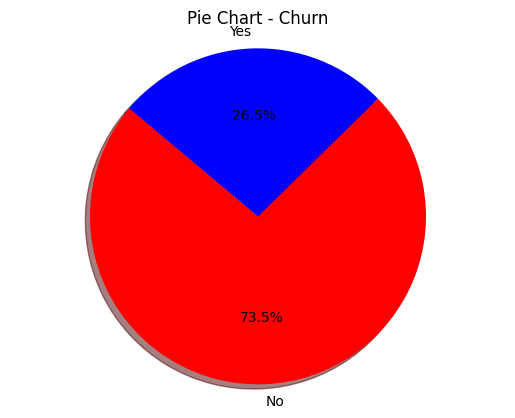

In [12]:
# Visualization of churn distribution using pie chart
# Plotting the pie chart
churn_dist=df.Churn.value_counts()
colors = ['red', 'blue']
plt.pie(churn_dist,labels=churn_dist.index,colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)

# Set aspect ratio to be equal so that the pie is drawn as a circle
plt.axis('equal')

# Adding a title
plt.title('Pie Chart - Churn')

# Display the chart
plt.show()

#### The data distribution shows that data is imbalanced, This can lead to biased ML models. it can have high accuracy while predicting majority class but may have less accuracy while predicting minority class. So this thing needs to be taken care while training model.

### Univariate Analysis for all the numeric variables in dataset using different plots

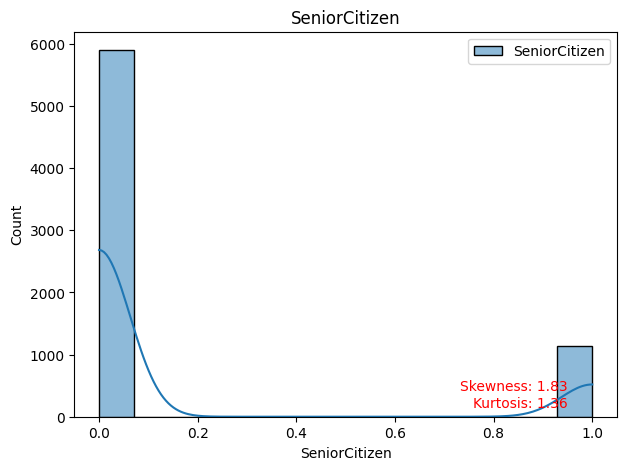

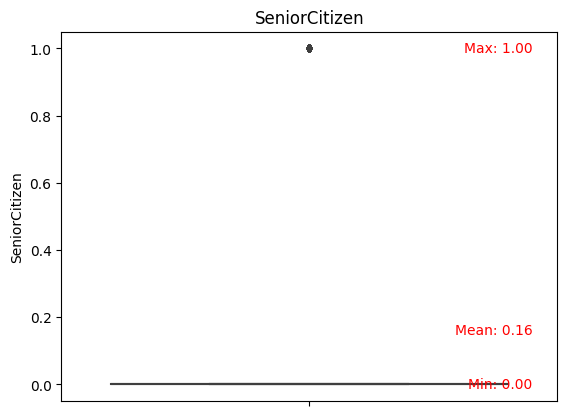

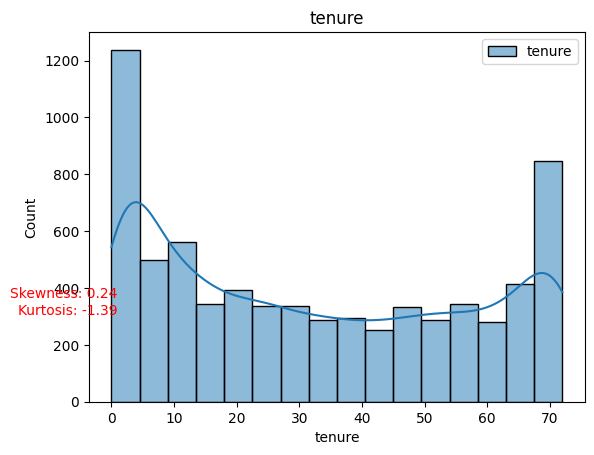

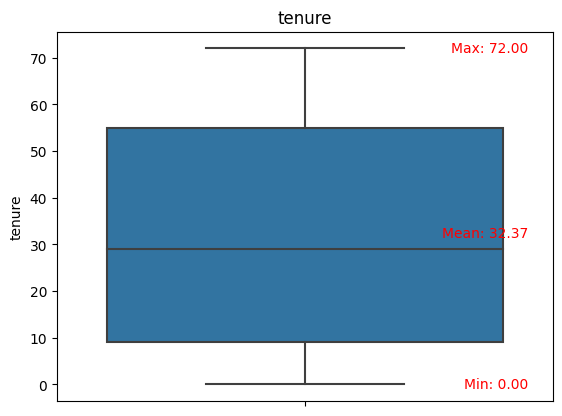

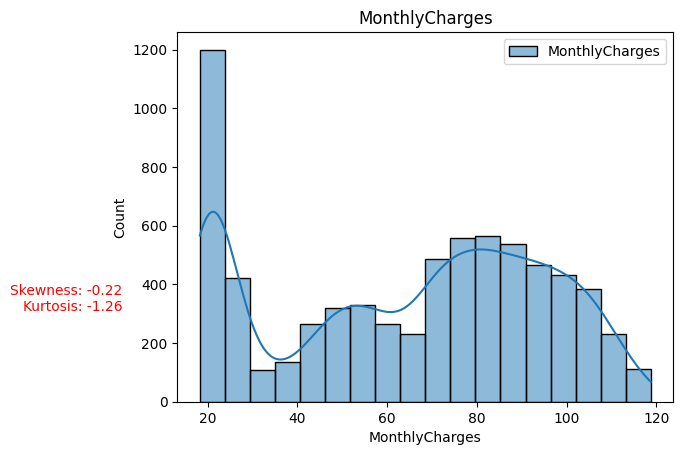

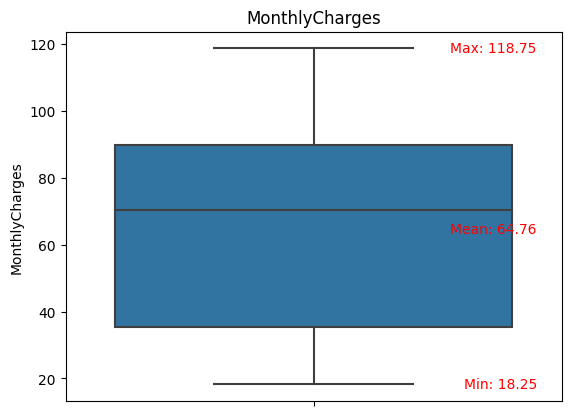

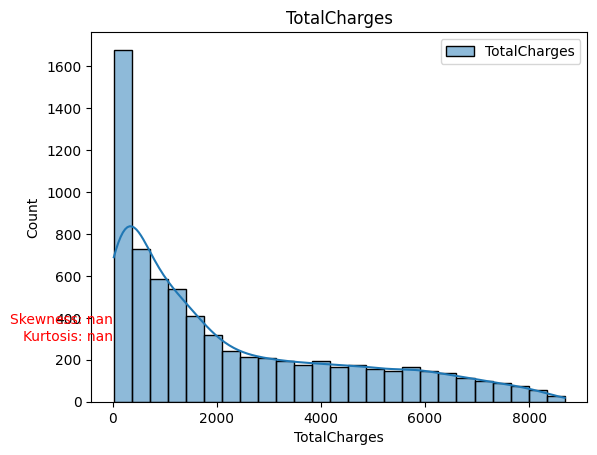

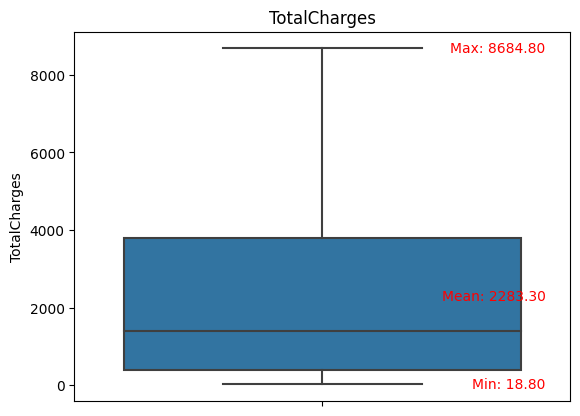

In [15]:
import scipy.stats as stats

# Set figure size for plots
plt.figure(figsize=(7,5))
# iterate through all numeric columns
for col in df.columns:
    if df[col].dtype == 'object':
        continue    
    # Calculate skewness and kurtosis of the column
    skewness=stats.skew(df[col])
    kurtosis=stats.kurtosis(df[col])  
    # Create a histogram of the column
    sns.histplot(data=df,x=col,kde=True,label=col)
    plt.title(col) 
    # Add a legend to the plot
    plt.legend()
    # Add skewness and kurtosis values to the plot
    plt.text(x=0.95,y=350,s=f"Skewness: {skewness:.2f}\nKurtosis: {kurtosis:.2f}",color='red',ha='right',va='center')
    plt.show()
    
    # Create a boxplot of the column
    ax = sns.boxplot(data=df, y=col, fliersize=4)
    
    # Add mean value to the boxplot
    mean_val = df[col].mean()
    plt.text(x=0.95, y=mean_val, s=f"Mean: {mean_val:.2f}", color='red', ha='right', va='center', transform=ax.get_yaxis_transform())
    
    # Add max and min values to the boxplot
    max_val = df[col].max()
    min_val = df[col].min()
    plt.text(x=0.95, y=max_val, s=f"Max: {max_val:.2f}", color='red', ha='right', va='center', transform=ax.get_yaxis_transform())
    plt.text(x=0.95, y=min_val, s=f"Min: {min_val:.2f}", color='red', ha='right', va='center', transform=ax.get_yaxis_transform())
    
    # Show outlier points
    for i, val in enumerate(df[col]):
        if val < ax.get_ylim()[0] or val > ax.get_ylim()[1]:
            ax.scatter(i, val, color='r', s=10)
    
    plt.title(col)
    plt.show()


### Analysis of Categorical columns using countplot

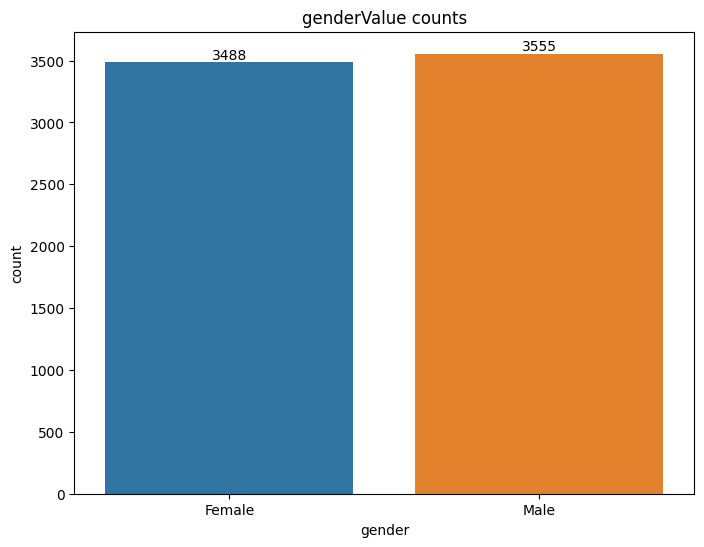

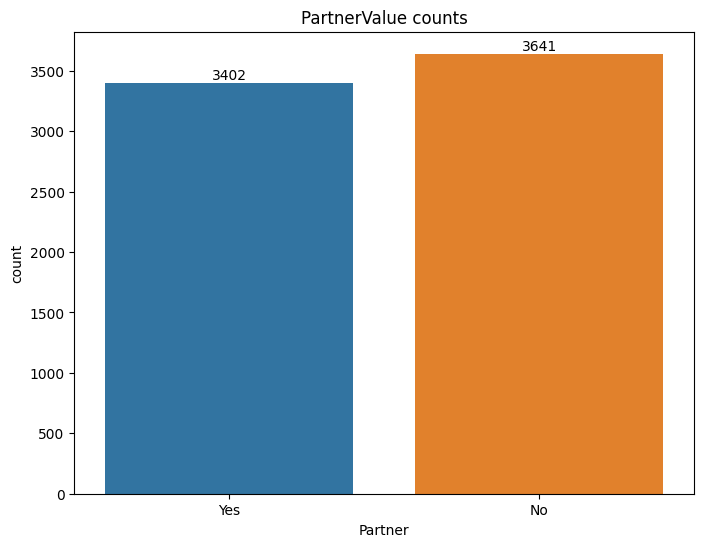

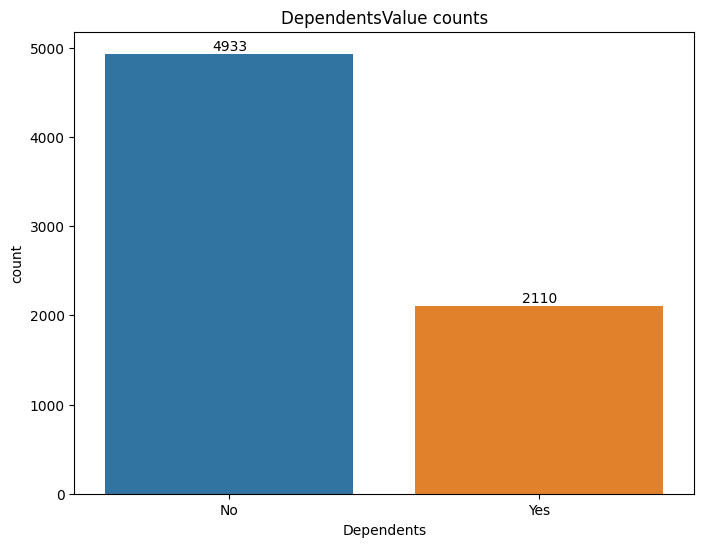

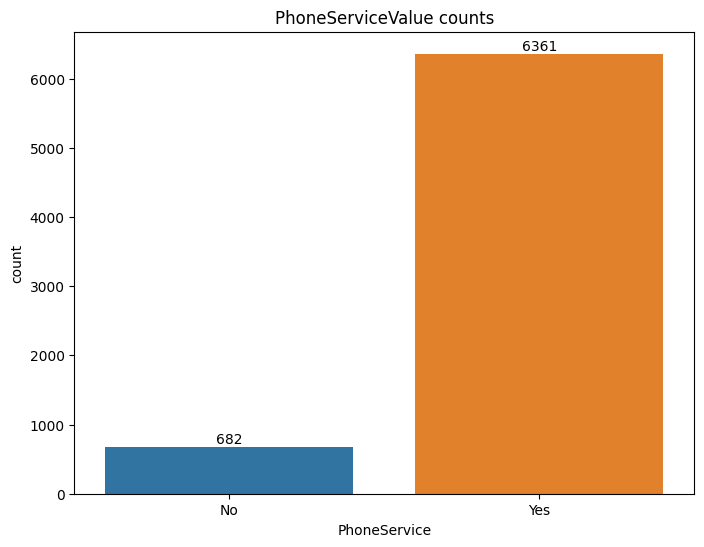

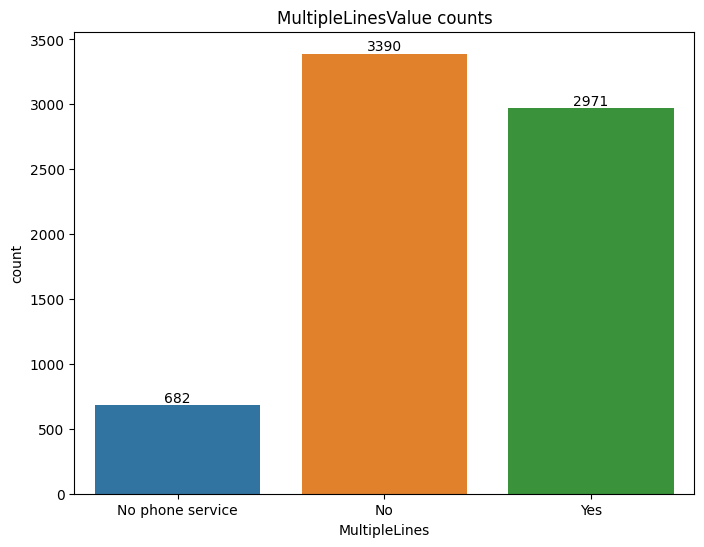

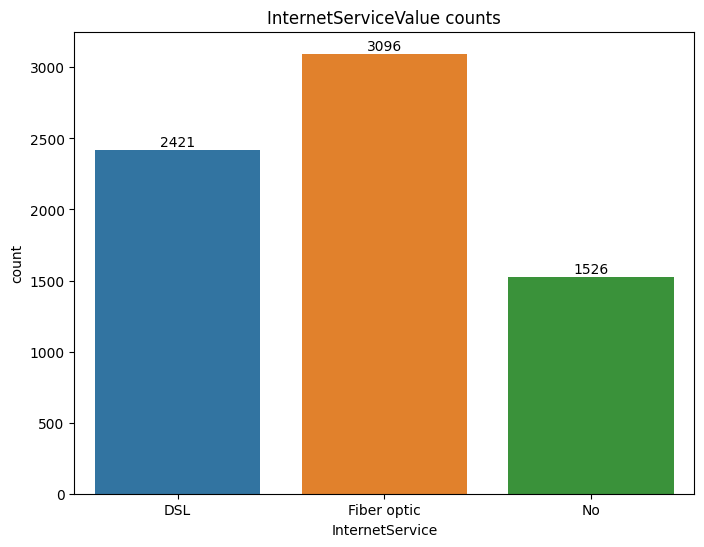

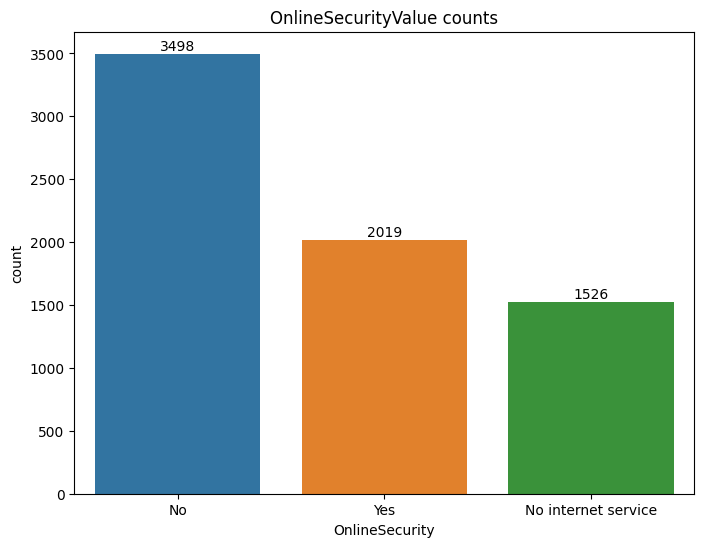

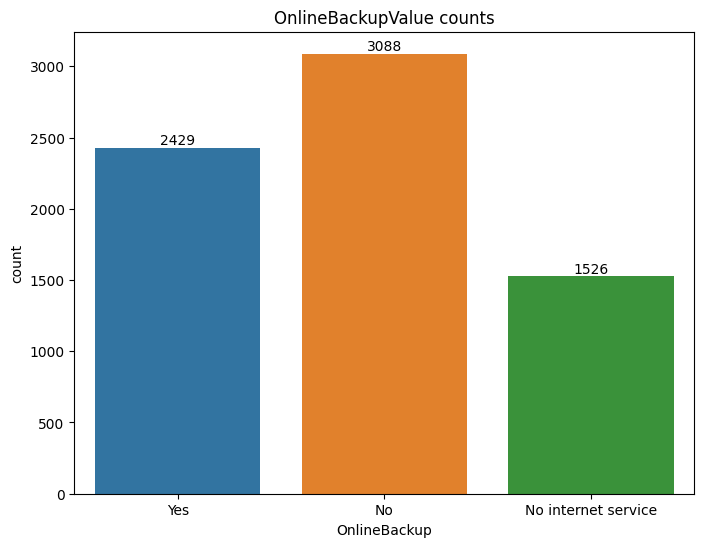

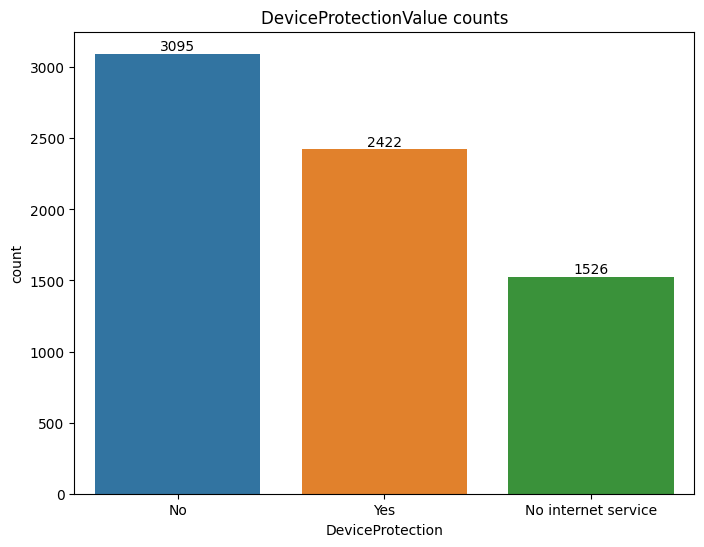

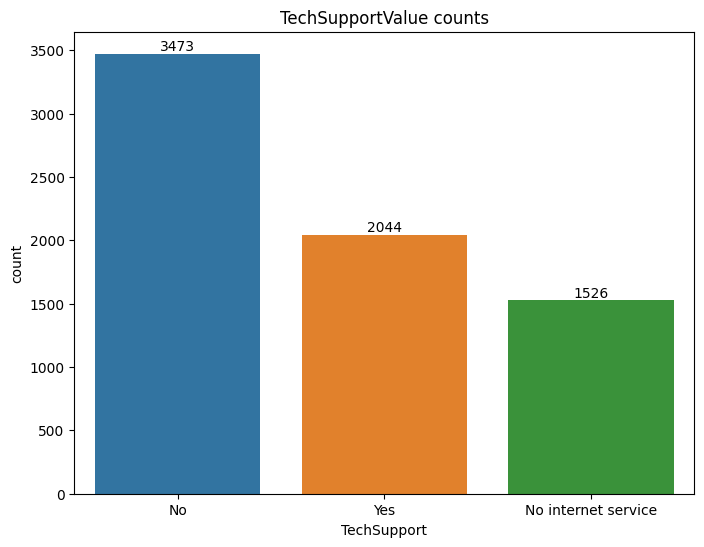

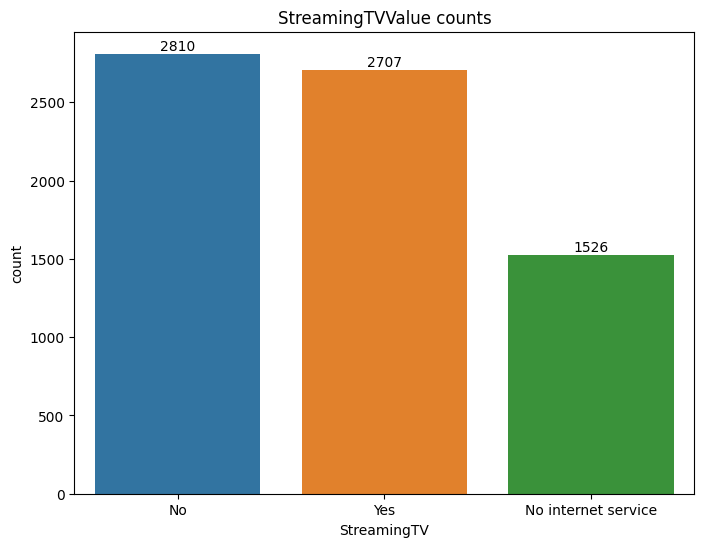

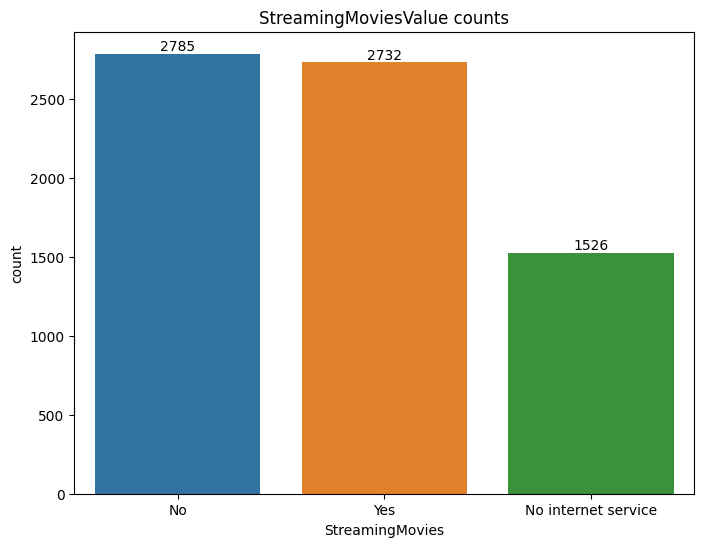

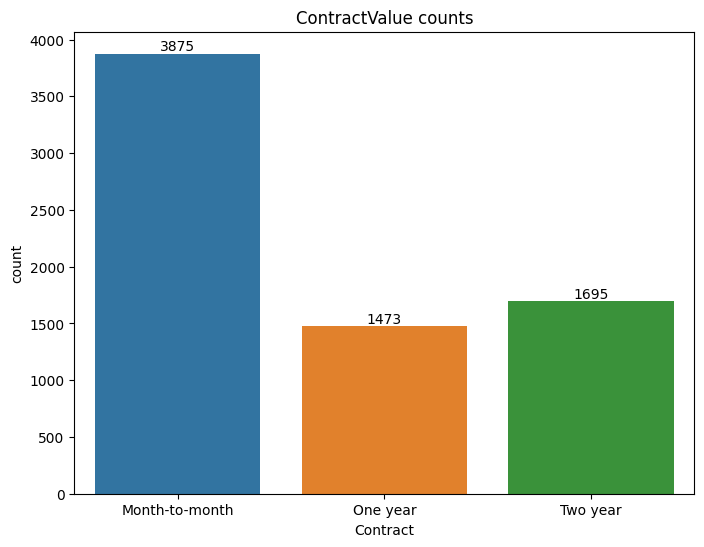

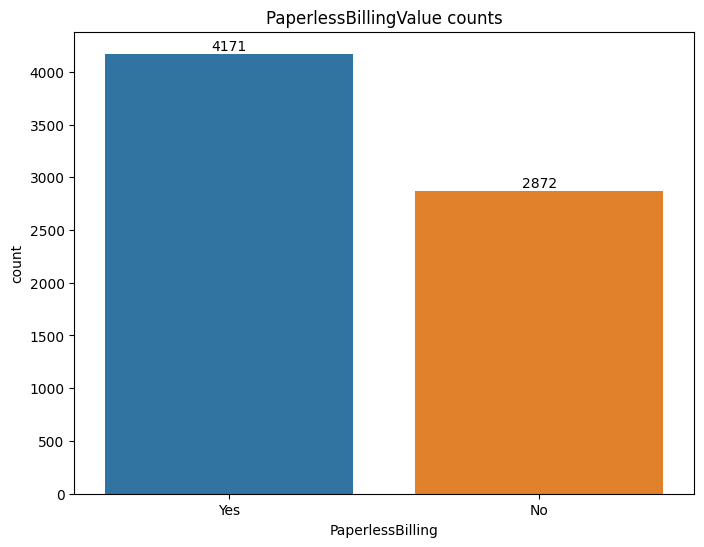

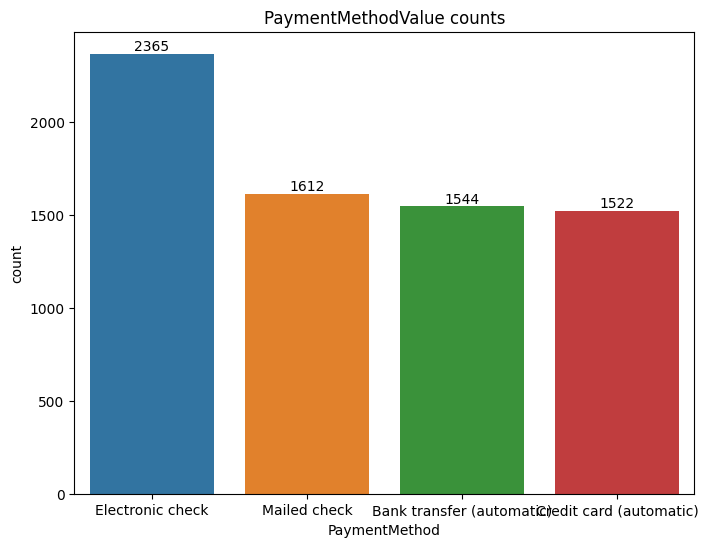

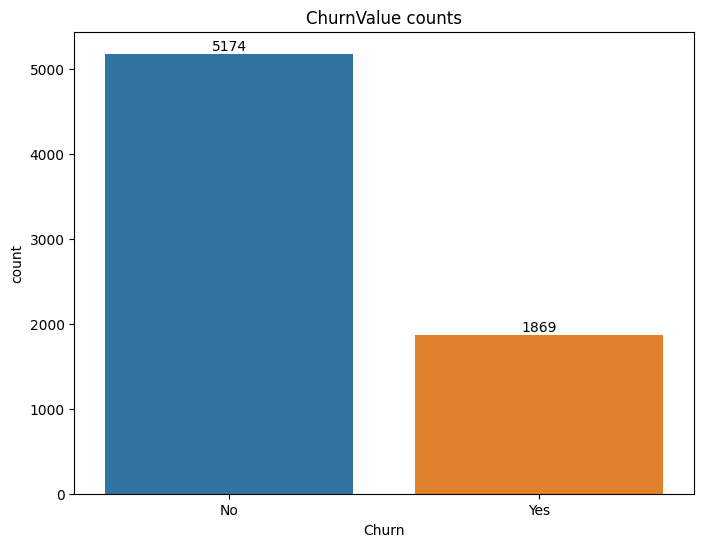

In [16]:
# drop customer id column
df1=df.drop("customerID",axis=1)
obj_col=df1.select_dtypes(include='object').columns
for col in obj_col:
    plt.figure(figsize=(8,6))
    ax=sns.countplot(x=col,data=df1)
    ax.set_title(f"{col}Value counts")
    for p in ax.patches:
        ax.text(p.get_x()+p.get_width()/2,p.get_height(),f"{p.get_height():.0f}",ha='center',va='bottom')
    plt.show()

### This was univariate analysis of numerical and categorical variables, they only give basic info not much insights so using Bivariate analysis.

#### Bivariate Analysis

#### Compare churn v/s total charges

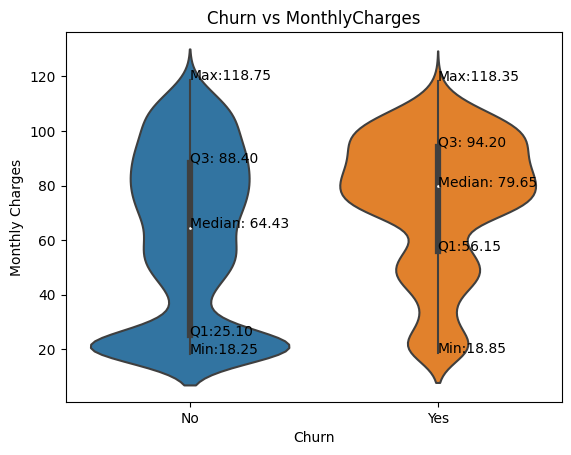

In [17]:
# Create a violin plot
ax = sns.violinplot(x='Churn', y='MonthlyCharges', data=df)

# Add title and y-label
ax.set_title('Churn vs MonthlyCharges')
ax.set_ylabel('Monthly Charges')

# Add statistical values for the spread
for i, category in enumerate(df['Churn'].unique()):
    data=df[df['Churn']==category]['MonthlyCharges']
    q1=data.quantile(0.25)
    median=data.median()
    q3=data.quantile(0.75)
    iqr=q3-q1
    upper_whisker=data[data<=(q3+1.5*iqr)].max()
    lower_whisker=data[data>=(q1-1.5*iqr)].min()
    ax.text(i,upper_whisker,f"Max:{upper_whisker:.2f}")
    ax.text(i,q3,f"Q3: {q3:.2f}")
    ax.text(i,median,f"Median: {median:.2f}")
    ax.text(i,q1,f"Q1:{q1:.2f}")
    ax.text(i,lower_whisker,f"Min:{lower_whisker:.2f}")
plt.show()

#### Total charges and monthly charges can be correlated, checking that

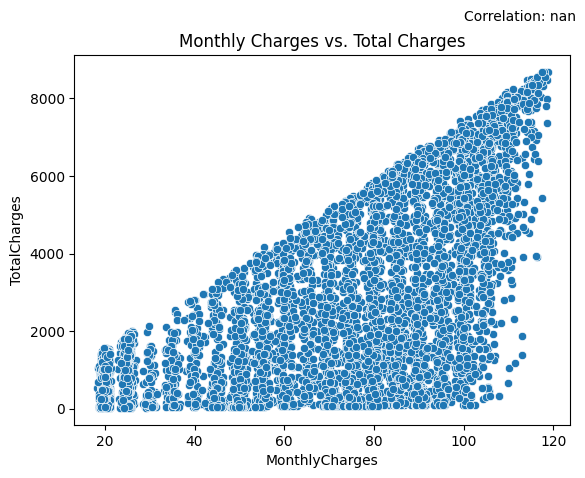

In [18]:
# Calculate correlation between MonthlyCharges and TotalCharges
corr=np.corrcoef(df['MonthlyCharges'],df['TotalCharges'])[0, 1]
# Create scatter plot
sns.scatterplot(x='MonthlyCharges',y='TotalCharges',data=df)
plt.title('Monthly Charges vs. Total Charges')
# Add correlation value to the plot
plt.text(100, 10000, f'Correlation: {corr:.2f}')
plt.show()


#### Correlation is good enough to use only 1 variable instead of these 2 variables

#### Checking correlation for tenure vs total charges

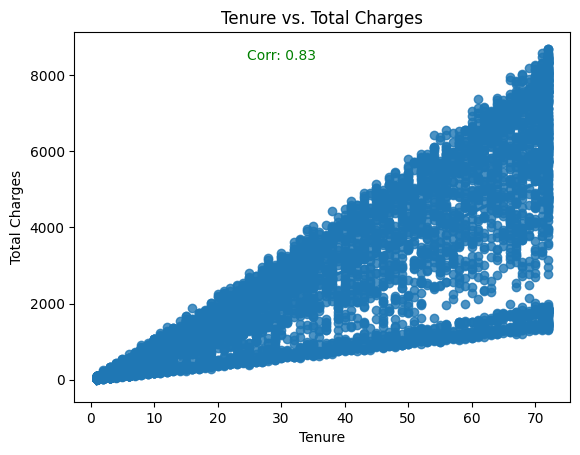

In [19]:
sns.regplot(x='tenure',y='TotalCharges',data=df)
plt.title("Tenure vs. Total Charges")
plt.xlabel("Tenure")
plt.ylabel("Total Charges")
# Calculate correlation coefficient
corr=df['tenure'].corr(df['TotalCharges'])
corr_text=f'Corr: {corr:.2f}'
# Add correlation value to the plot
plt.text(30,8500,corr_text,ha='center',va='center',color='green')
plt.show()

#### This is also a good correlation, one variable can be kept at time of model training amongst these 2

#### Boxplot analysis: Total charges vs all categorical variables

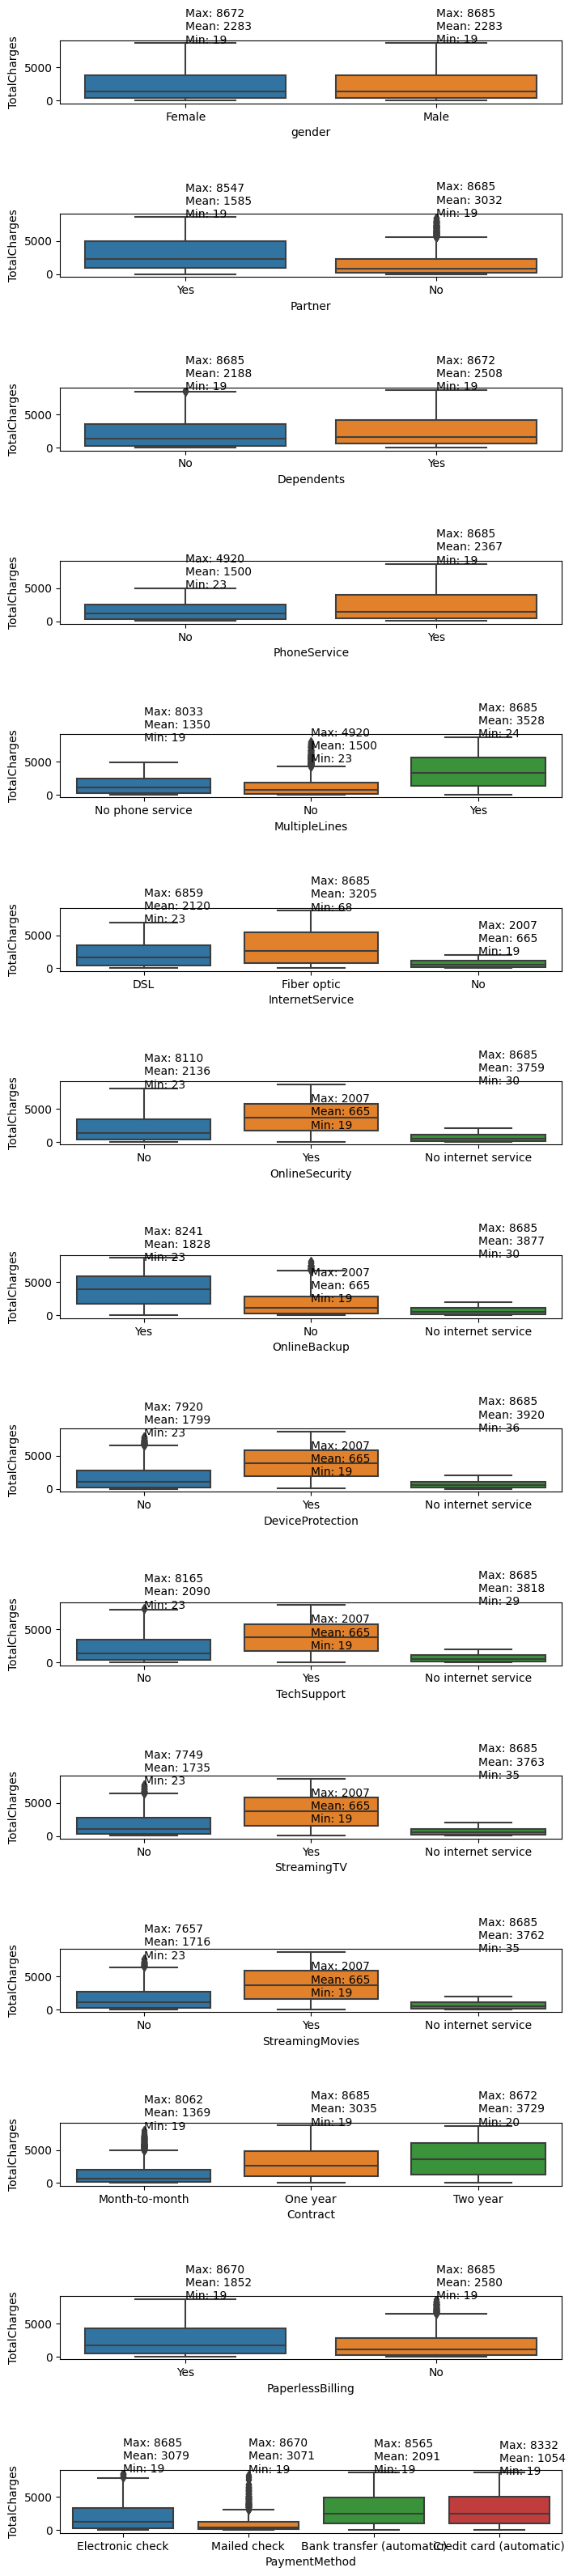

In [20]:
# list of categorical columns except customer id and churn
cat_cols=df.select_dtypes(include=['object']).columns.drop(['customerID','Churn'])
fig,axes=plt.subplots(nrows=len(cat_cols),ncols=1,figsize=(8,40))
plt.subplots_adjust(wspace=2, hspace=1.75)
for i,col in enumerate(cat_cols):
    sns.boxplot(x=col,y='TotalCharges',data=df,ax=axes[i])
    axes[i].set_xlabel(col)
    # add mean,min and max to plots
    stats_df=df.groupby(col).agg({'TotalCharges':['mean','max','min']})
    for idx,label in enumerate(stats_df.index):
        axes[i].text(idx, stats_df.loc[label,('TotalCharges','max')], 
                      f"Max: {stats_df.loc[label,('TotalCharges','max')]:.0f}\n"
                      f"Mean: {stats_df.loc[label,('TotalCharges','mean')]:.0f}\n"
                      f"Min: {stats_df.loc[label,('TotalCharges','min')]:.0f}")
plt.show()

#### Boxplot analysis: Tenure vs all categorical variables

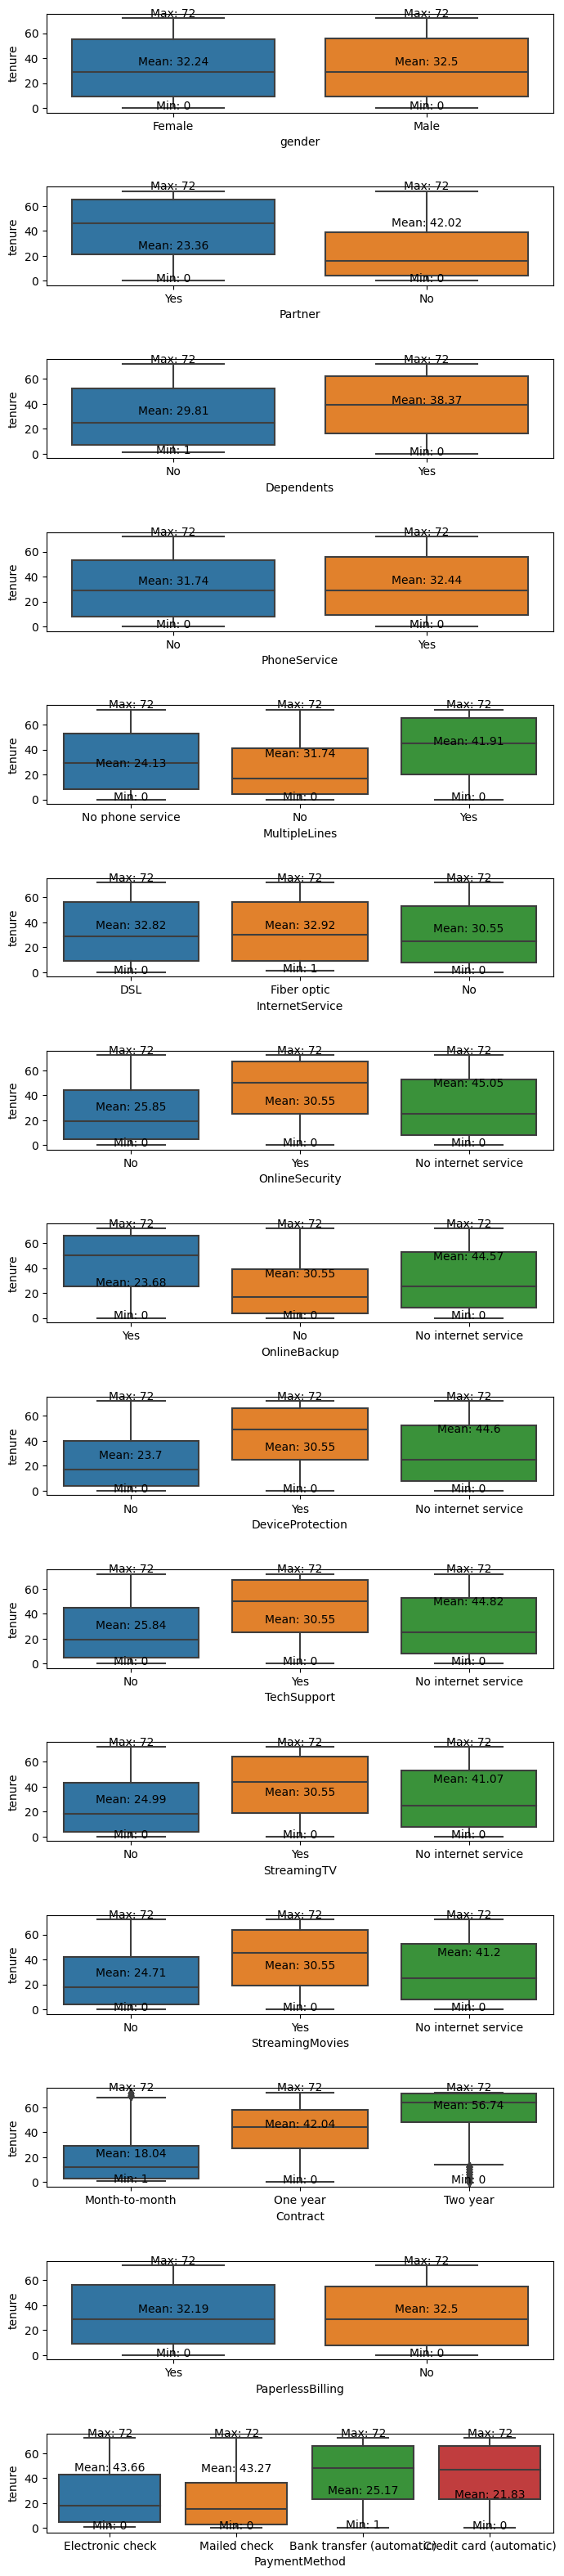

In [21]:
cat_cols=df.select_dtypes(include=['object']).columns.drop(['Churn','customerID'])
fig,axes=plt.subplots(nrows=len(cat_cols), ncols=1, figsize=(8, 40))
plt.subplots_adjust(wspace=0.75, hspace=0.75)

#Loop through each categorical column and create a box plot with tenure
for i,col in enumerate(cat_cols):
    sns.boxplot(x=col,y='tenure',data=df,ax=axes[i])
    axes[i].set_xlabel(col)
    # Add min,max and mea values to the plot
    mean= round(df.groupby(col)['tenure'].mean(),2)
    max_val=df.groupby(col)['tenure'].max()
    min_val=df.groupby(col)['tenure'].min()    
    for j in range(len(mean)):
        axes[i].text(j,max_val[j]+1, f'Max: {max_val[j]}',ha='center')
        axes[i].text(j,mean[j], f'Mean: {mean[j]}',ha='center',va='bottom')
        axes[i].text(j,min_val[j]-1, f'Min: {min_val[j]}',ha='center')
plt.show()


### Multi-variate analysis: HeatMap

#### Between numerical variable:

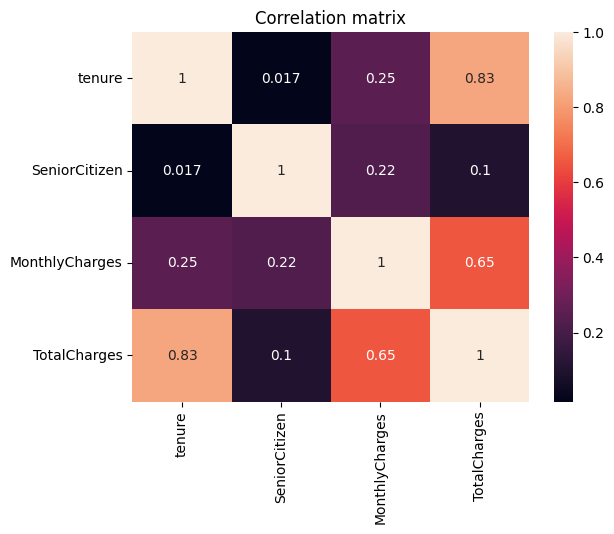

In [22]:
numerical_cols=['tenure','SeniorCitizen','MonthlyCharges','TotalCharges']
corr_matrix=df[numerical_cols].corr()
sns.heatmap(corr_matrix,annot=True)
plt.title('Correlation matrix')
plt.show()

#### Analysis based on some combination of features: like  monthly charges for internet service type and contract

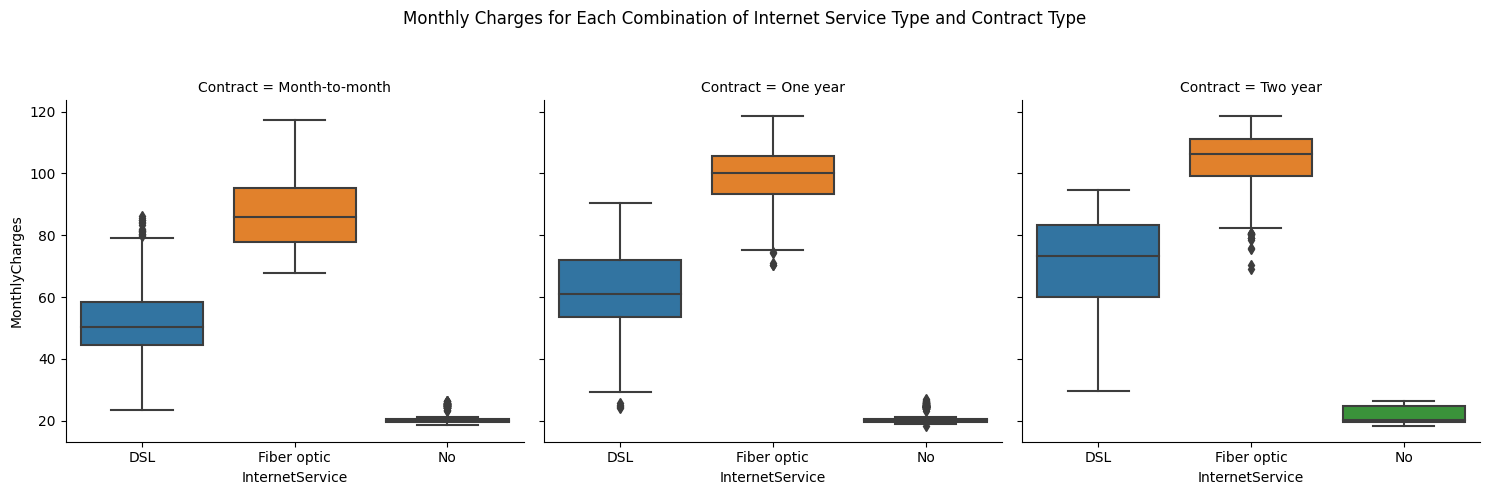

In [23]:
internet_contract=df[['InternetService','Contract','MonthlyCharges']]
sns.catplot(x='InternetService',y='MonthlyCharges',col='Contract',data=internet_contract,kind='box')
plt.suptitle('Monthly Charges for Each Combination of Internet Service Type and Contract Type')
plt.subplots_adjust(top=0.8)
plt.show()
                     

#### Number of customers who churned or not depending on internet service and payment type

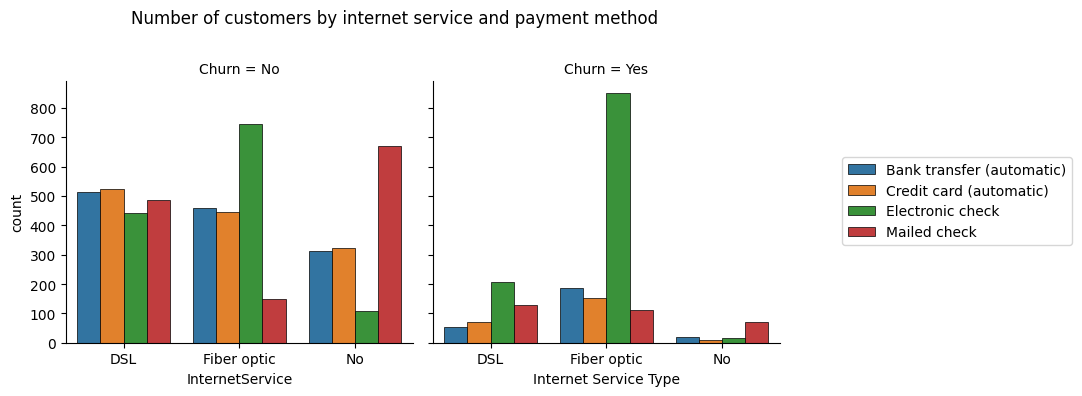

In [24]:
data_subset=df[['Churn','InternetService','PaymentMethod']]
# group by and count occurances
data_grouped=data_subset.groupby(['Churn','InternetService','PaymentMethod']).size().reset_index(name='count')
sns.catplot(x='InternetService',y='count',hue='PaymentMethod',col='Churn',data=data_grouped,
            kind='bar',height=4,aspect=1,legend=False,edgecolor='black',linewidth=0.5)
plt.subplots_adjust(top=0.8)
plt.suptitle('Number of customers by internet service and payment method',fontsize=12)
plt.xlabel('Internet Service Type',fontsize=10)
plt.ylabel('Number of Customers',fontsize=10)
# Add legend
handles,labels=plt.gca().get_legend_handles_labels()
plt.gcf().legend(handles,labels,bbox_to_anchor=(1.05, 0.5),loc='center left')

 #### The above 2 plots give a lot of info about the dataset and some base on which we can build more insigts like forming new hypothesis etc.

### Hypothesis Testing:


#### Statement. Chances of customer leaving organisation is influenced by contract type  
Null hypo: Customers on 2 year contract are less likely to churn  

Alternate hypo: Customers on 2 year contract are more likely to churn

Chi-Squared: 1184.5965720837926
P-Value: 5.863038300673391e-258
Degrees of Freedom: 2
Expected Frequencies:
 [[2846.69175067 1028.30824933]
 [1082.11018032  390.88981968]
 [1245.198069    449.801931  ]]


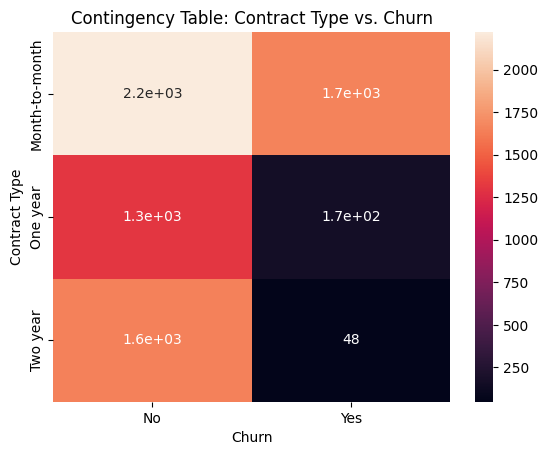

In [25]:
from scipy.stats import chi2_contingency
cont_table=pd.crosstab(df['Contract'],df['Churn'])
chi2,pval,dof,expected=chi2_contingency(cont_table)
# Print the test results
print(f"Chi-Squared: {chi2}")
print(f"P-Value: {pval}")
print(f"Degrees of Freedom: {dof}")
print("Expected Frequencies:\n", expected)

# Visualize the contingency table as a heatmap
sns.heatmap(cont_table,annot=True)

# Add labels and title
plt.xlabel('Churn')
plt.ylabel('Contract Type')
plt.title('Contingency Table: Contract Type vs. Churn')
# Display the plot
plt.show()

#### We have to accept null hypothesis as p value is greater than significant value(0.05) so as of now it can be concluded there is no significant relationship between churn rate and contract type

#### Similarly checking for payment method  
Null hypothesis is : Mailed check method brings more churn  
Alternate hypothesis is : The above statement is not correct

Chi-Squared: 648.1423274814
P-Value: 3.6823546520097993e-140
Degrees of Freedom: 3
Expected Frequencies:
 [[1134.26891949  409.73108051]
 [1118.10705665  403.89294335]
 [1737.40025557  627.59974443]
 [1184.22376828  427.77623172]]


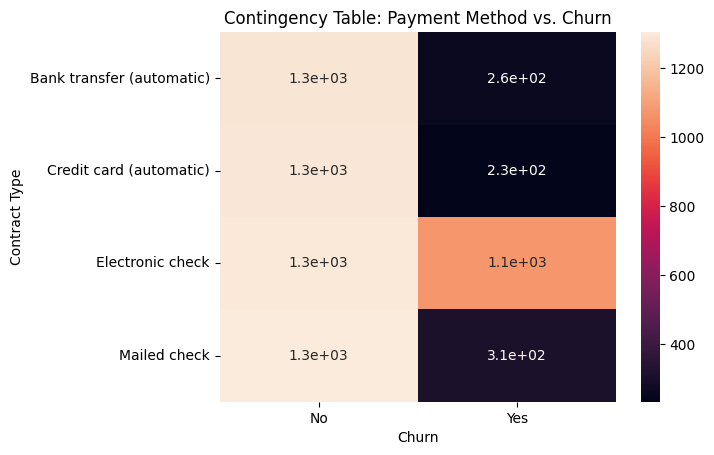

In [26]:
from scipy.stats import chi2_contingency
cont_table=pd.crosstab(df['PaymentMethod'],df['Churn'])
chi2,pval,dof,expected=chi2_contingency(cont_table)
# Print the test results
print(f"Chi-Squared: {chi2}")
print(f"P-Value: {pval}")
print(f"Degrees of Freedom: {dof}")
print("Expected Frequencies:\n", expected)

# Visualize the contingency table as a heatmap
sns.heatmap(cont_table,annot=True)

# Add labels and title
plt.xlabel('Churn')
plt.ylabel('Contract Type')
plt.title('Contingency Table: Payment Method vs. Churn')
# Display the plot
plt.show()

#### Here also null hypothesis is correct, not enough evidence to rule that out

### There can be more hypothesis' and analysis depending upon business questions and requirements, now proceeding further to feature processing/engineering

In [27]:
# Checking duplicates
print('No of duplicate rows:',df.duplicated().sum())

No of duplicate rows: 0


#### Splitting dataset and removing customer id

In [28]:
df1=df.copy()
df1.drop(['customerID'],axis=1,inplace=True)
X=df1.drop('Churn',axis=1)
y=df1['Churn']

#### Handling missing values

In [29]:
# check missing values
missing_values=X.isna().sum()
print(missing_values)

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
dtype: int64


#### Some missing values are there,although they can be removed as they are very few in number but alwasys try to keep as much data as possible because this small data can have some important information

#### Using imputer to handle missing values

In [30]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(strategy="mean")
X['TotalCharges']=imputer.fit_transform(X[['TotalCharges']])

#### Now there will be no missing values as I used mean of existing values to fill missing values in total charges column, other than mean other strategies like median/ mode can also be used

### Creating new features by combining existing ones which resemble like: monthly and total payment,streamingTV and streaming movies, this is done to reduce complexity and increase efficiency. Columns are comibned based on info in dataset

#### Online Security and device protection:  
Combining into 1 feature like: Security Services

In [31]:
X['SecurityServices']=X['OnlineSecurity']+X['DeviceProtection']
#Processing new column values
X['SecurityServices']=X['SecurityServices'].replace({'NoNo': 'NoneSecurityServices',
                                                       'YesNo': 'OnlyOnlineSecurity',
                                                       'NoYes': 'OnlyDeviceProtection','YesYes': 'BothSecurityServices'})
X=X.drop(['OnlineSecurity','DeviceProtection'],axis=1)
X.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineBackup,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,SecurityServices
0,Female,0,Yes,No,1,No,No phone service,DSL,Yes,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,NoneSecurityServices
1,Male,0,No,No,34,Yes,No,DSL,No,No,No,No,One year,No,Mailed check,56.95,1889.50,BothSecurityServices
2,Male,0,No,No,2,Yes,No,DSL,Yes,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,OnlyOnlineSecurity
3,Male,0,No,No,45,No,No phone service,DSL,No,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,BothSecurityServices
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,NoneSecurityServices


#### Streaming movies and streaming TV are also similar and can be combined:

In [32]:
X['StreamingServices']=X['StreamingTV']+X['StreamingMovies']
X['StreamingServices']=X['StreamingServices'].replace({'NoNo': 'NoneStreamingServices', 
                                                         'YesNo': 'OnlyStreamingTV', 
                                                         'NoYes': 'OnlyStreamingMovies','YesYes': 'BothStreamingServices'})
X.drop(['StreamingTV','StreamingMovies'],inplace=True,axis=1)
X.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineBackup,TechSupport,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,SecurityServices,StreamingServices
0,Female,0,Yes,No,1,No,No phone service,DSL,Yes,No,Month-to-month,Yes,Electronic check,29.85,29.85,NoneSecurityServices,NoneStreamingServices
1,Male,0,No,No,34,Yes,No,DSL,No,No,One year,No,Mailed check,56.95,1889.50,BothSecurityServices,NoneStreamingServices
2,Male,0,No,No,2,Yes,No,DSL,Yes,No,Month-to-month,Yes,Mailed check,53.85,108.15,OnlyOnlineSecurity,NoneStreamingServices
3,Male,0,No,No,45,No,No phone service,DSL,No,Yes,One year,No,Bank transfer (automatic),42.30,1840.75,BothSecurityServices,NoneStreamingServices
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,NoneSecurityServices,NoneStreamingServices


In [33]:
X.shape

(7043, 17)

#### Similarly Internet service and online backup can be merged  
Creating new feature named InternetServices

In [34]:
# Create a new feature called "InternetServices"
X['InternetServices']=X.apply(lambda row:'DSL Only' if row['InternetService']=='DSL' and row['OnlineBackup']=='No' else
                                          'Fiber Optic Only' if row['InternetService']=='Fiber optic' and row['OnlineBackup']=='No' else
                                          'Internet and Backup' if (row['InternetService']=='DSL' or row['InternetService']=='Fiber optic') and row['OnlineBackup'] == 'Yes' else
                                          'No Internet Service',axis=1)
X = X.drop(['InternetService','OnlineBackup'],axis=1)
X.shape

(7043, 16)

In [35]:
X.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,TechSupport,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,SecurityServices,StreamingServices,InternetServices
0,Female,0,Yes,No,1,No,No phone service,No,Month-to-month,Yes,Electronic check,29.85,29.85,NoneSecurityServices,NoneStreamingServices,Internet and Backup
1,Male,0,No,No,34,Yes,No,No,One year,No,Mailed check,56.95,1889.50,BothSecurityServices,NoneStreamingServices,DSL Only
2,Male,0,No,No,2,Yes,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,OnlyOnlineSecurity,NoneStreamingServices,Internet and Backup
3,Male,0,No,No,45,No,No phone service,Yes,One year,No,Bank transfer (automatic),42.30,1840.75,BothSecurityServices,NoneStreamingServices,DSL Only
4,Female,0,No,No,2,Yes,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,NoneSecurityServices,NoneStreamingServices,Fiber Optic Only


#### Phone service and multiple lines can be combined into 1 feature

In [36]:
X['PhoneServices']=X.apply(lambda x:'MultipleLines' if x['MultipleLines']=='Yes' else 'SingleLine',axis=1)
X.drop(['PhoneService', 'MultipleLines'], axis=1, inplace=True)
X.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,TechSupport,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,SecurityServices,StreamingServices,InternetServices,PhoneServices
0,Female,0,Yes,No,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,NoneSecurityServices,NoneStreamingServices,Internet and Backup,SingleLine
1,Male,0,No,No,34,No,One year,No,Mailed check,56.95,1889.50,BothSecurityServices,NoneStreamingServices,DSL Only,SingleLine
2,Male,0,No,No,2,No,Month-to-month,Yes,Mailed check,53.85,108.15,OnlyOnlineSecurity,NoneStreamingServices,Internet and Backup,SingleLine
3,Male,0,No,No,45,Yes,One year,No,Bank transfer (automatic),42.30,1840.75,BothSecurityServices,NoneStreamingServices,DSL Only,SingleLine
4,Female,0,No,No,2,No,Month-to-month,Yes,Electronic check,70.70,151.65,NoneSecurityServices,NoneStreamingServices,Fiber Optic Only,SingleLine


In [37]:
X.dtypes

gender                object
SeniorCitizen          int64
Partner               object
Dependents            object
tenure                 int64
TechSupport           object
Contract              object
PaperlessBilling      object
PaymentMethod         object
MonthlyCharges       float64
TotalCharges         float64
SecurityServices      object
StreamingServices     object
InternetServices      object
PhoneServices         object
dtype: object

### Feature Encodings: checking unique values first and then encoding them using one hot encoder

In [38]:
for col in X.columns:
    print(f"Column '{col}' categories: {X[col].unique()}")

Column 'gender' categories: ['Female' 'Male']
Column 'SeniorCitizen' categories: [0 1]
Column 'Partner' categories: ['Yes' 'No']
Column 'Dependents' categories: ['No' 'Yes']
Column 'tenure' categories: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
Column 'TechSupport' categories: ['No' 'Yes' 'No internet service']
Column 'Contract' categories: ['Month-to-month' 'One year' 'Two year']
Column 'PaperlessBilling' categories: ['Yes' 'No']
Column 'PaymentMethod' categories: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Column 'MonthlyCharges' categories: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
Column 'TotalCharges' categories: [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Column 'SecurityServices' categories: ['NoneSecurityServices' 'BothSecurityServices' 'OnlyOn

#### Some of the columns can be encoded only, not all the columns can be encoded

In [39]:
from sklearn.preprocessing import OneHotEncoder
columns=['gender','Partner','Dependents','PaperlessBilling','TechSupport', 'Contract','PaymentMethod', 'PhoneServices',
                     'SecurityServices','StreamingServices','InternetServices']
one_hot=OneHotEncoder()
encode_cols=one_hot.fit_transform(X[columns])
# creating new dataframe with encoded values
encoded_df=pd.DataFrame(encode_cols.toarray(),columns=one_hot.get_feature_names_out(columns))
# drop original columns from dataframe
X.drop(columns,inplace=True,axis=1)
# concatenate new columns in original dataframe
X=pd.concat([X,encoded_df],axis=1)
X.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,SecurityServices_OnlyOnlineSecurity,StreamingServices_BothStreamingServices,StreamingServices_No internet serviceNo internet service,StreamingServices_NoneStreamingServices,StreamingServices_OnlyStreamingMovies,StreamingServices_OnlyStreamingTV,InternetServices_DSL Only,InternetServices_Fiber Optic Only,InternetServices_Internet and Backup,InternetServices_No Internet Service
0,0,1,29.85,29.85,1.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0,34,56.95,1889.50,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0,2,53.85,108.15,0.0,1.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0,45,42.30,1840.75,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0,2,70.70,151.65,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [40]:
X.columns

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges',
       'gender_Female', 'gender_Male', 'Partner_No', 'Partner_Yes',
       'Dependents_No', 'Dependents_Yes', 'PaperlessBilling_No',
       'PaperlessBilling_Yes', 'TechSupport_No',
       'TechSupport_No internet service', 'TechSupport_Yes',
       'Contract_Month-to-month', 'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'PhoneServices_MultipleLines', 'PhoneServices_SingleLine',
       'SecurityServices_BothSecurityServices',
       'SecurityServices_No internet serviceNo internet service',
       'SecurityServices_NoneSecurityServices',
       'SecurityServices_OnlyDeviceProtection',
       'SecurityServices_OnlyOnlineSecurity',
       'StreamingServices_BothStreamingServices',
       'StreamingServices_No internet serviceNo internet service',
     

In [41]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 38 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   SeniorCitizen                                             7043 non-null   int64  
 1   tenure                                                    7043 non-null   int64  
 2   MonthlyCharges                                            7043 non-null   float64
 3   TotalCharges                                              7043 non-null   float64
 4   gender_Female                                             7043 non-null   float64
 5   gender_Male                                               7043 non-null   float64
 6   Partner_No                                                7043 non-null   float64
 7   Partner_Yes                                               7043 non-null   float64
 8   Dependents_No     

#### Checking and converting target label to numerical

In [42]:
y.head()

0     No
1     No
2    Yes
3     No
4    Yes
Name: Churn, dtype: object

In [43]:
y=y.replace({'Yes':1,'No':0})

In [44]:
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int64

### Feature Scaling: Scaling the features using minmax scaler to bring them on same scale of values

In [45]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X[['MonthlyCharges','TotalCharges','tenure']]=scaler.fit_transform(X[['MonthlyCharges','TotalCharges','tenure']])
X.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,SecurityServices_OnlyOnlineSecurity,StreamingServices_BothStreamingServices,StreamingServices_No internet serviceNo internet service,StreamingServices_NoneStreamingServices,StreamingServices_OnlyStreamingMovies,StreamingServices_OnlyStreamingTV,InternetServices_DSL Only,InternetServices_Fiber Optic Only,InternetServices_Internet and Backup,InternetServices_No Internet Service
0,0,0.013889,0.115423,0.001275,1.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0,0.472222,0.385075,0.215867,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0,0.027778,0.354229,0.010310,0.0,1.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0,0.625000,0.239303,0.210241,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0,0.027778,0.521891,0.015330,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


#### Looking for Correlation

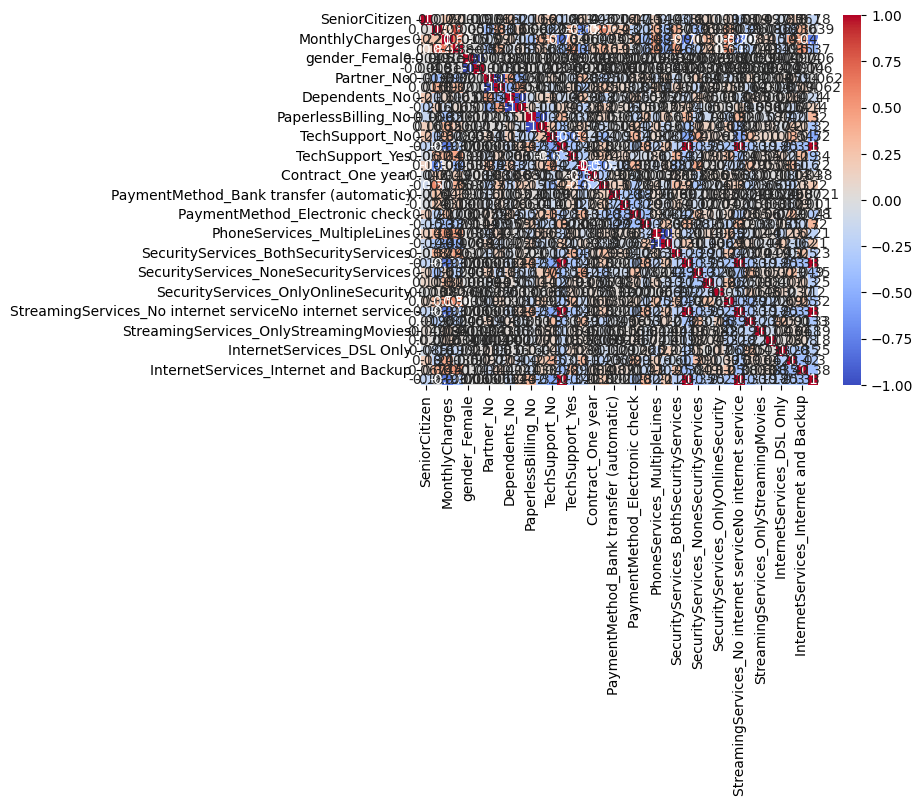

In [46]:
corr=X.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

#### In the figure not many things are clear but some vairbles do have strong correlation amongst them

### Machine Learning:

#### Splitting data: since data is imbalanced ,I am using stratified sampling using stratified=y.

In [47]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,stratify=y,random_state=49)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((5634, 38), (1409, 38), (5634,), (1409,))

#### Trying Logistic Regression: For imbalanced datasets , regularization(either L1 or L2) can be used. it can increase generalization capability of the model. Lasso regression can be helpful in one way that it shrink coefficients of less important features to zero so that impact of irrelevant or noisy features is reduced, however only regularization cannot handle imbalance in theh dataset, other techniqes like: undersampling, oversampling might help or using more advanced algorithms.

In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [49]:
lasso_pipeline=Pipeline([('scaler',StandardScaler()),('clf',LogisticRegression(penalty='l1',solver='liblinear'))])
ridge_pipeline=Pipeline([('scaler',StandardScaler()),('clf',LogisticRegression(penalty='l2'))])

In [50]:
# Parameters for gripsearchCV
lasso_param={'clf__C':[0.01,0.1,1,10,100]}
ridge_param={'clf__C':[0.01,0.1,1,10,100]}
# use gridsearchCV to search hyperparameters
lasso_grid=GridSearchCV(lasso_pipeline,param_grid=lasso_param,cv=5)
ridge_grid=GridSearchCV(ridge_pipeline,param_grid=ridge_param,cv=5)

lasso_grid.fit(X_train,y_train)
ridge_grid.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('clf', LogisticRegression())]),
             param_grid={'clf__C': [0.01, 0.1, 1, 10, 100]})

In [51]:
y_pred_lasso=lasso_grid.predict(X_test)
y_pred_ridge=ridge_grid.predict(X_test)

In [52]:
from sklearn import metrics
lasso_accuracy=metrics.accuracy_score(y_test,y_pred_lasso)
lasso_recall=metrics.recall_score(y_test,y_pred_lasso)
lasso_precision=metrics.precision_score(y_test,y_pred_lasso)
lasso_f1=metrics.f1_score(y_test,y_pred_lasso)
ridge_accuracy=metrics.accuracy_score(y_test,y_pred_ridge)
ridge_precision=metrics.precision_score(y_test,y_pred_ridge)
ridge_recall=metrics.recall_score(y_test,y_pred_ridge)
ridge_f1=metrics.f1_score(y_test,y_pred_ridge)
# Print the accuracy metrics for both classifiers
print("Lasso Classifier")
print(f"Accuracy: {lasso_accuracy}")
print(f"Precision: {lasso_precision}")
print(f"Recall: {lasso_recall}")
print(f"F1 Score: {lasso_f1}\n")
print("Ridge Classifier")
print(f"Accuracy: {ridge_accuracy}")
print(f"Precision: {ridge_precision}")
print(f"Recall: {ridge_recall}")
print(f"F1 Score: {ridge_f1}\n")

Lasso Classifier
Accuracy: 0.8034066713981547
Precision: 0.6520376175548589
Recall: 0.5561497326203209
F1 Score: 0.6002886002886003

Ridge Classifier
Accuracy: 0.801277501774308
Precision: 0.6525974025974026
Recall: 0.5374331550802139
F1 Score: 0.5894428152492668



#### Both lasso and ridge have similar metrics only, this means that there is no overfitting / underfitting, however the precision,recall and f1 score values are quite low which suggest that model can be improved using a different algorithm or by tuning current algorihtm hyperparameters

#### As the dataset is imbalanced, I will use imbalanced-learn (also known as imblearn) module of python, its useful for handling imbalanced datasets and can do many things like: sampling,training,evaluation etc

### Machine Learning different algorithms

#### Model 1: Random forest with imbalanced dataset: random forest is robust classifier so we need not scale the values , we can use them as they are

In [56]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,precision_score,recall_score,f1_score
from imblearn.metrics import geometric_mean_score


In [57]:
# create model
rf=RandomForestClassifier(random_state=49)
rf.fit(X_train,y_train)
rf_y_pred=rf.predict(X_test)

In [58]:
# print classification report 
print(classification_report(y_test,rf_y_pred))

              precision    recall  f1-score   support

           0       0.82      0.90      0.86      1035
           1       0.62      0.47      0.54       374

    accuracy                           0.78      1409
   macro avg       0.72      0.68      0.70      1409
weighted avg       0.77      0.78      0.77      1409



#### Geometric mean: perfomance metric to evaluate classification models, it measures geometric mean of recall.Its calculated by taking product of recall values of each class and then taking nth root of this product where n is no of classes. The geometric mean is useful in situations where there is imbalance in class distribution, as in this case other metrics like accuracy can be misleading as model may perform better on majority class but geometric mean provides more balanced evaluation by considering performance of model on all classes equally.A higher value of the geometric mean score is better as it indicates better overall performance of the model across all classes.The maximum value that the geometric mean score can take is 1, which indicates perfect classification performance. However, achieving a score of 1 is rare, and a score close to 1 is considered good. The interpretation of the geometric mean score can depend on the problem domain and the specific application. For example, in a binary classification problem with imbalanced classes, a high geometric mean score indicates that the model is performing well on both the positive and negative classes. In a multi-class classification problem, a high geometric mean score indicates that the model is performing well on all classes.

In [60]:
gm_rf=geometric_mean_score(y_test,rf_y_pred)
print("The geometric mean for Random Forest over dataset is:", gm_rf)

The geometric mean for Random Forest over dataset is: 0.649567587386064


In [61]:
results=[]

#### Its a good score

#### Need to try out various models fot this prediction so to decide at last which model to use , creating a dataframe consisting of key metrics for each model

In [62]:
accuracy=accuracy_score(y_test,rf_y_pred)
precision=precision_score(y_test,rf_y_pred)
recall=recall_score(y_test,rf_y_pred)
f1=f1_score(y_test,rf_y_pred)
gmean=geometric_mean_score(y_test,rf_y_pred)
model1_data = {
    'Model': 'RandForest_im_data','Accuracy': accuracy,'Precision': precision,'Recall': recall,'F1-score': f1}

#### Model 2:Decision tree over imbalanced data

In [63]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
# Create a pipeline with StandardScaler and Decision Tree classifier
dt_clf=make_pipeline(StandardScaler(),DecisionTreeClassifier())
# Fit the pipeline to the training data
dt_clf.fit(X_train,y_train)
# Predict on the test data
y_pred_DT=dt_clf.predict(X_test)
print(classification_report(y_test,y_pred_DT))

              precision    recall  f1-score   support

           0       0.83      0.81      0.82      1035
           1       0.51      0.54      0.52       374

    accuracy                           0.74      1409
   macro avg       0.67      0.67      0.67      1409
weighted avg       0.74      0.74      0.74      1409



In [64]:
# Calculate the geometric mean 
gmean_DT=geometric_mean_score(y_test,y_pred_DT)
print("The geometric mean for Decision Tree dataset is:", gmean_DT)

The geometric mean for Decision Tree dataset is: 0.6608949566213337


In [66]:
accuracy = accuracy_score(y_test, y_pred_DT)
precision = precision_score(y_test, y_pred_DT)
recall=recall_score(y_test,y_pred_DT)
f1=f1_score(y_test,y_pred_DT)
gmean=geometric_mean_score(y_test,y_pred_DT)
model2_data={'Model':'DT_Imb_data','Accuracy':accuracy,'Precision':precision,'Recall':recall,'F1-score':f1}

#### Model 3:Naive Bayes over balanced data  
over Synthetic Minority Oversampling Technique (SMOTE),as the dataset is imbalanced,one way to solve this is to oversample the examples in minority class

In [67]:
from imblearn.over_sampling import SMOTE
smote=SMOTE()
X_train_resampled,y_train_resampled=smote.fit_resample(X_train,y_train)
# Count the number of samples in each class
unique,counts=np.unique(y_train,return_counts=True)
class_counts=dict(zip(unique,counts))
print("Class counts before SMOTE:",class_counts)
unique,counts=np.unique(y_train_resampled,return_counts=True)
class_counts=dict(zip(unique,counts))
print("Class counts after SMOTE:",class_counts)

Class counts before SMOTE: {0: 4139, 1: 1495}
Class counts after SMOTE: {0: 4139, 1: 4139}


In [68]:
# create the model
from sklearn.naive_bayes import GaussianNB
nb_model=GaussianNB()

In [69]:
nb_model.fit(X_train_resampled,y_train_resampled)

GaussianNB()

In [70]:
y_pred_nb=nb_model.predict(X_test)

In [71]:
print(classification_report(y_test,y_pred_nb))

              precision    recall  f1-score   support

           0       0.90      0.70      0.79      1035
           1       0.49      0.78      0.60       374

    accuracy                           0.72      1409
   macro avg       0.69      0.74      0.69      1409
weighted avg       0.79      0.72      0.74      1409



In [72]:
# Calculate the geometric mean 
gmean_nb=geometric_mean_score(y_test,y_pred_nb)
print("The geometric mean for Naive Bayes over Balanced dataset is:",gmean_nb)

The geometric mean for Naive Bayes over Balanced dataset is: 0.740037555785326


In [73]:
accuracy=accuracy_score(y_test,y_pred_nb)
precision=precision_score(y_test,y_pred_nb)
recall=recall_score(y_test,y_pred_nb)
f1=f1_score(y_test,y_pred_nb)
gmean=geometric_mean_score(y_test,y_pred_nb)
model3_data = {'Model': 'Naive_B_data','Accuracy': accuracy,'Precision': precision,'Recall': recall,'F1-score': f1}

#### Model 4:SVM over balanced data  
scaling may be necessary to ensure that all features are on a similar scale for SVM

In [74]:
# create model:
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
# Create a pipeline with StandardScaler and SVM classifier
svm_clf=make_pipeline(StandardScaler(),SVC())

In [75]:
# fit the piipeline to training model
svm_clf.fit(X_train_resampled,y_train_resampled)
# Predict on the test data
y_pred_SVM=svm_clf.predict(X_test)

In [76]:
# Print the classification report
print(classification_report(y_test,y_pred_SVM))

              precision    recall  f1-score   support

           0       0.88      0.75      0.81      1035
           1       0.51      0.71      0.59       374

    accuracy                           0.74      1409
   macro avg       0.69      0.73      0.70      1409
weighted avg       0.78      0.74      0.75      1409



In [77]:
# Calculate the geometric mean 
gmean_SVM=geometric_mean_score(y_test,y_pred_SVM)
print("The geometric mean for SVM is:",gmean_SVM)

The geometric mean for SVM is: 0.7298048739892945


In [79]:
accuracy=accuracy_score(y_test,y_pred_SVM)
precision=precision_score(y_test,y_pred_SVM)
recall=recall_score(y_test,y_pred_SVM)
f1=f1_score(y_test,y_pred_SVM)
gmean=geometric_mean_score(y_test,y_pred_SVM)
model4_data = {
    'Model': 'SVM_B_data','Accuracy': accuracy,'Precision': precision,'Recall': recall,'F1-score': f1}


#### Model 5:KNN over balanced data  
scaling may be necessary to ensure that all features are on a similar scale for KNN

In [80]:
# create model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
knn_clf=make_pipeline(StandardScaler(),KNeighborsClassifier(n_neighbors=5))

In [81]:
# train the model
knn_clf.fit(X_train_resampled,y_train_resampled)
y_pred_knn=knn_clf.predict(X_test)

In [82]:
print(classification_report(y_test,y_pred_knn))

              precision    recall  f1-score   support

           0       0.87      0.70      0.77      1035
           1       0.46      0.72      0.56       374

    accuracy                           0.70      1409
   macro avg       0.67      0.71      0.67      1409
weighted avg       0.76      0.70      0.72      1409



In [83]:
gmean_rf=geometric_mean_score(y_test,y_pred_knn)
print("The geometric mean for K-Nearest Neighbors over balanced dataset is:",gmean_rf)

The geometric mean for K-Nearest Neighbors over balanced dataset is: 0.7078443931621927


In [84]:
accuracy=accuracy_score(y_test,y_pred_knn)
precision=precision_score(y_test,y_pred_knn)
recall=recall_score(y_test,y_pred_knn)
f1=f1_score(y_test,y_pred_knn)
gmean=geometric_mean_score(y_test,y_pred_knn)
model5_data = {
    'Model': 'KNN_B_data','Accuracy': accuracy,'Precision': precision,'Recall': recall,'F1-score': f1}

#### Model 6:Gradient Boosting over balanced data 

In [85]:
# create model
from sklearn.ensemble import GradientBoostingClassifier
gb_clf=GradientBoostingClassifier(random_state=49)

In [86]:
#trqin model
gb_clf.fit(X_train_resampled,y_train_resampled)
y_pred_gb=gb_clf.predict(X_test)

In [87]:
# Print the classification report
print(classification_report(y_test,y_pred_gb))

              precision    recall  f1-score   support

           0       0.88      0.80      0.84      1035
           1       0.56      0.70      0.62       374

    accuracy                           0.77      1409
   macro avg       0.72      0.75      0.73      1409
weighted avg       0.79      0.77      0.78      1409



In [88]:
# Calculate the geometric mean 
gmean_gb=geometric_mean_score(y_test,y_pred_gb)
print("The geometric mean for Xgboost over balanced dataset is:",gmean_gb)

The geometric mean for Xgboost over balanced dataset is: 0.7481650635444741


In [89]:
accuracy = accuracy_score(y_test, y_pred_gb)
precision = precision_score(y_test, y_pred_gb)
recall = recall_score(y_test, y_pred_gb)
f1 = f1_score(y_test, y_pred_gb)
gmean = geometric_mean_score(y_test, y_pred_gb)
model6_data = {
    'Model': 'GradientBoosting_B_data','Accuracy': accuracy,'Precision': precision,'Recall': recall,'F1-score': f1}

In [90]:
# Append the data to the 'results' list
results.append(model1_data)
results.append(model2_data)
results.append(model3_data)
results.append(model4_data)
results.append(model5_data)
results.append(model6_data)

In [91]:
df_results = pd.DataFrame(results)
# Print the DataFrame
print(df_results)

                     Model  Accuracy  Precision    Recall  F1-score
0       RandForest_im_data  0.783534   0.621908  0.470588  0.535769
1              DT_Imb_data  0.737402   0.505000  0.540107  0.521964
2             Naive_B_data  0.722498   0.485857  0.780749  0.598974
3               SVM_B_data  0.740241   0.507663  0.708556  0.591518
4               KNN_B_data  0.702626   0.461407  0.719251  0.562173
5  GradientBoosting_B_data  0.772889   0.557447  0.700535  0.620853


In [92]:
df_results.sort_values(by='F1-score', ascending=False, inplace=True)
print(df_results)

                     Model  Accuracy  Precision    Recall  F1-score
5  GradientBoosting_B_data  0.772889   0.557447  0.700535  0.620853
2             Naive_B_data  0.722498   0.485857  0.780749  0.598974
3               SVM_B_data  0.740241   0.507663  0.708556  0.591518
4               KNN_B_data  0.702626   0.461407  0.719251  0.562173
0       RandForest_im_data  0.783534   0.621908  0.470588  0.535769
1              DT_Imb_data  0.737402   0.505000  0.540107  0.521964


#### Selecting GradientBoosting Classifier as of now as it has best f-1 score, doing hyperparameter tuning for this 

In [93]:
from sklearn.model_selection import GridSearchCV
# Define the classifier as GradientBoostingClassifier
clf=GradientBoostingClassifier()
# Define the parameter grid for grid search
param_grid={'n_estimators':[10,20,50,100,200,500],'learning_rate':[0.5,0.1,0.05,0.01],'max_depth': [2,3,4,5]}

# Create a GridSearchCV object with the classifier and hyperparameters to be tuned
grid_search=GridSearchCV(estimator=clf,param_grid=param_grid,scoring='f1',cv=5,n_jobs=-1,verbose=1)

In [94]:
grid_search.fit(X_train, y_train)


Fitting 5 folds for each of 96 candidates, totalling 480 fits


GridSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.5, 0.1, 0.05, 0.01],
                         'max_depth': [2, 3, 4, 5],
                         'n_estimators': [10, 20, 50, 100, 200, 500]},
             scoring='f1', verbose=1)

In [95]:
# print best hyperparameters:
print("Best hyperparameters:",grid_search.best_params_)
print("F1 score:",grid_search.best_score_)

Best hyperparameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
F1 score: 0.5861240480602175


In [96]:
# Predict on the test data
y_pred_gboost_H=grid_search.predict(X_test)
# Print the classification report
print(classification_report(y_test,y_pred_gboost_H))

              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1035
           1       0.63      0.52      0.57       374

    accuracy                           0.79      1409
   macro avg       0.74      0.71      0.72      1409
weighted avg       0.78      0.79      0.79      1409



In [97]:
# Fit the GridSearchCV object to the training data
grid_search.fit(X_train_resampled,y_train_resampled)

Fitting 5 folds for each of 96 candidates, totalling 480 fits


GridSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.5, 0.1, 0.05, 0.01],
                         'max_depth': [2, 3, 4, 5],
                         'n_estimators': [10, 20, 50, 100, 200, 500]},
             scoring='f1', verbose=1)

In [98]:
print("Best hyperparameters:", grid_search.best_params_)
print("F1 score:", grid_search.best_score_)

Best hyperparameters: {'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 200}
F1 score: 0.834999736287332


In [100]:
learning_rate=0.1  # Set the learning rate
n_estimators=100  # Set the number of estimators
max_depth=3 # set max depth
clf_best_params=GradientBoostingClassifier(learning_rate=learning_rate, n_estimators=n_estimators, max_depth=max_depth)
clf_best_params.fit(X_train, y_train)

GradientBoostingClassifier()

#### Save model using joblib

In [101]:
import joblib
# Save the model
joblib.dump(clf_best_params,"model_gb.pkl")

['model_gb.pkl']

In [102]:
X_train.columns

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges',
       'gender_Female', 'gender_Male', 'Partner_No', 'Partner_Yes',
       'Dependents_No', 'Dependents_Yes', 'PaperlessBilling_No',
       'PaperlessBilling_Yes', 'TechSupport_No',
       'TechSupport_No internet service', 'TechSupport_Yes',
       'Contract_Month-to-month', 'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'PhoneServices_MultipleLines', 'PhoneServices_SingleLine',
       'SecurityServices_BothSecurityServices',
       'SecurityServices_No internet serviceNo internet service',
       'SecurityServices_NoneSecurityServices',
       'SecurityServices_OnlyDeviceProtection',
       'SecurityServices_OnlyOnlineSecurity',
       'StreamingServices_BothStreamingServices',
       'StreamingServices_No internet serviceNo internet service',
     

#### As I need to develop an app for predictig churn, the number of features is so high to continue with so using feature selection algorithm to reduce number of features, using Recursive feature elimination technique to reduce number of features, also using some models' inbuilt feature importances

In [105]:
# USing random forest also to see the feature importance
model=RandomForestClassifier()
model.fit(X_train_resampled,y_train_resampled)
# Get feature importances
importances=model.feature_importances_
# Sort features based on importance
sorted_indices=np.argsort(importances)[::-1]
sorted_features=X.columns[sorted_indices]
# Print feature importances
for feature in sorted_features:
    print(f"{feature}")

tenure
TotalCharges
MonthlyCharges
Contract_Month-to-month
TechSupport_No
PaymentMethod_Electronic check
SecurityServices_NoneSecurityServices
Contract_Two year
InternetServices_Fiber Optic Only
Contract_One year
PaperlessBilling_No
SecurityServices_OnlyDeviceProtection
TechSupport_Yes
StreamingServices_BothStreamingServices
gender_Female
gender_Male
SecurityServices_OnlyOnlineSecurity
PaymentMethod_Credit card (automatic)
PaperlessBilling_Yes
Partner_No
SecurityServices_BothSecurityServices
Partner_Yes
Dependents_No
SeniorCitizen
Dependents_Yes
InternetServices_Internet and Backup
StreamingServices_NoneStreamingServices
PhoneServices_MultipleLines
PhoneServices_SingleLine
PaymentMethod_Bank transfer (automatic)
PaymentMethod_Mailed check
TechSupport_No internet service
StreamingServices_OnlyStreamingTV
StreamingServices_OnlyStreamingMovies
InternetServices_DSL Only
StreamingServices_No internet serviceNo internet service
SecurityServices_No internet serviceNo internet service
Internet

In [106]:
# using lasso to find feature importance
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel
# Train model with L1 regularization
model=LogisticRegression(penalty='l1',solver='liblinear')
model.fit(X_train_resampled,y_train_resampled)
# Use SelectFromModel to identify important features
sfm=SelectFromModel(model,prefit=True)
selected_features=X.columns[sfm.get_support()]
# Print selected features
for feature in selected_features:
    print(feature)

SeniorCitizen
tenure
TotalCharges
gender_Male
Partner_No
Dependents_Yes
PaperlessBilling_No
TechSupport_No
Contract_Month-to-month
Contract_Two year
PaymentMethod_Credit card (automatic)
PaymentMethod_Electronic check
PaymentMethod_Mailed check
PhoneServices_SingleLine
SecurityServices_BothSecurityServices
SecurityServices_NoneSecurityServices
SecurityServices_OnlyDeviceProtection
SecurityServices_OnlyOnlineSecurity
StreamingServices_BothStreamingServices
StreamingServices_No internet serviceNo internet service
StreamingServices_NoneStreamingServices
StreamingServices_OnlyStreamingTV
InternetServices_DSL Only
InternetServices_Fiber Optic Only


In [108]:
# Using gradient bossitng inbuilt feature importance:
clf_feature_selected.fit(X_train_resampled,y_train_resampled)
importances=clf_feature_selected.feature_importances_
# Sort features based on importance
sorted_indices=importances.argsort()[::-1]
sorted_features=X.columns[sorted_indices]
# Print feature importances
for feature in sorted_features:
    print(f"{feature}")

Contract_Month-to-month
tenure
PaymentMethod_Electronic check
TechSupport_No
InternetServices_Fiber Optic Only
StreamingServices_BothStreamingServices
SecurityServices_NoneSecurityServices
MonthlyCharges
SecurityServices_OnlyDeviceProtection
TotalCharges
PaperlessBilling_Yes
Contract_Two year
SecurityServices_OnlyOnlineSecurity
Contract_One year
PaperlessBilling_No
TechSupport_Yes
Dependents_Yes
Dependents_No
PaymentMethod_Credit card (automatic)
SecurityServices_BothSecurityServices
gender_Female
PhoneServices_MultipleLines
PhoneServices_SingleLine
StreamingServices_OnlyStreamingTV
InternetServices_Internet and Backup
PaymentMethod_Mailed check
StreamingServices_NoneStreamingServices
SeniorCitizen
gender_Male
PaymentMethod_Bank transfer (automatic)
Partner_No
Partner_Yes
InternetServices_DSL Only
StreamingServices_OnlyStreamingMovies
StreamingServices_No internet serviceNo internet service
InternetServices_No Internet Service
SecurityServices_No internet serviceNo internet service
Tec

In [119]:
from sklearn.feature_selection import RFE
clf_feature_selected=GradientBoostingClassifier(n_estimators=200,max_depth=3,learning_rate=0.05)
rfe=RFE(estimator=clf_feature_selected,n_features_to_select=10)
rfe.fit(X_train_resampled,y_train_resampled)
# print features selected by RFE
selected_features=X_train.columns[rfe.support_]
print(selected_features)

Index(['tenure', 'MonthlyCharges', 'TechSupport_No', 'Contract_Month-to-month',
       'Contract_Two year', 'PaymentMethod_Electronic check',
       'SecurityServices_NoneSecurityServices',
       'SecurityServices_OnlyDeviceProtection',
       'StreamingServices_BothStreamingServices',
       'InternetServices_Fiber Optic Only'],
      dtype='object')


#### All the above methods give different feature subsets so choosing the one provided by RFE method as it runs iteratively over all features and eliminates the less important features keeping the important ones

In [110]:
clf=GradientBoostingClassifier()
# define feature selector
selector=RFE(clf,n_features_to_select=10)
# define pipeline
pipe=Pipeline([('selector',selector),('clf',clf)])
# hyperparameters
params={'clf__n_estimators':[100,200,300],'clf__max_depth':[3,4,5],'clf__learning_rate':[0.01,0.05,0.1]}
# use grid search:
grid_search=GridSearchCV(pipe,params,cv=4,scoring='f1')
grid_search.fit(X_train_resampled[selected_features],y_train_resampled)

GridSearchCV(cv=4,
             estimator=Pipeline(steps=[('selector',
                                        RFE(estimator=GradientBoostingClassifier(),
                                            n_features_to_select=10)),
                                       ('clf', GradientBoostingClassifier())]),
             param_grid={'clf__learning_rate': [0.01, 0.05, 0.1],
                         'clf__max_depth': [3, 4, 5],
                         'clf__n_estimators': [100, 200, 300]},
             scoring='f1')

In [111]:
print("Best hyperparameters:", grid_search.best_params_)
print("F1 score:", grid_search.best_score_)

Best hyperparameters: {'clf__learning_rate': 0.1, 'clf__max_depth': 5, 'clf__n_estimators': 100}
F1 score: 0.8294450151631956


In [112]:
# Predict the labels of the test data using the best estimator found by the grid search
y_pred=grid_search.best_estimator_.predict(X_test[selected_features])
# Print the accuracy metrics
print("Accuracy: {}".format(accuracy_score(y_test,y_pred)))
print("Precision: {}".format(precision_score(y_test,y_pred)))
print("Recall: {}".format(recall_score(y_test,y_pred)))
print("F1 Score: {}".format(f1_score(y_test,y_pred)))

Accuracy: 0.7743080198722498
Precision: 0.5603448275862069
Recall: 0.6951871657754011
F1 Score: 0.620525059665871


In [120]:
X_train_selected_features=X_train_resampled[selected_features]
X_train_selected_features.shape
X_train_selected_features.columns

Index(['tenure', 'MonthlyCharges', 'TechSupport_No', 'Contract_Month-to-month',
       'Contract_Two year', 'PaymentMethod_Electronic check',
       'SecurityServices_NoneSecurityServices',
       'SecurityServices_OnlyDeviceProtection',
       'StreamingServices_BothStreamingServices',
       'InternetServices_Fiber Optic Only'],
      dtype='object')

#### Fitting final model for use in app and saving it using pickle

In [124]:
learning_rate=0.1  # Set the learning rate
n_estimators=100  # Set the number of estimators
max_depth=5 # set max depth
clf_best_params_features_selected=GradientBoostingClassifier(learning_rate=learning_rate, n_estimators=n_estimators, max_depth=max_depth)
clf_best_params_features_selected.fit(X_train_selected_features, y_train_resampled)

GradientBoostingClassifier(max_depth=5)

In [126]:
X_train_selected_features.columns

Index(['tenure', 'MonthlyCharges', 'TechSupport_No', 'Contract_Month-to-month',
       'Contract_Two year', 'PaymentMethod_Electronic check',
       'SecurityServices_NoneSecurityServices',
       'SecurityServices_OnlyDeviceProtection',
       'StreamingServices_BothStreamingServices',
       'InternetServices_Fiber Optic Only'],
      dtype='object')

In [125]:
import joblib
# Save the model
joblib.dump(clf_best_params_features_selected,"model_gb_selected_features.pkl")

['model_gb_selected_features.pkl']